In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
dataset = pd.read_csv('data.csv')
dataset

,population,benefit
0,0.0000,17.59200
1,0.0000,9.13020
2,0.0000,13.66200
3,0.0000,11.85400
4,0.0000,6.82330
...,...,...
92,0.0000,7.20290
93,0.0000,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   benefit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
handelNoneNumbers = ['population']
for coloumn in handelNoneNumbers:
    dataset[coloumn] = dataset[coloumn].replace(0, np.nan)
    mean = int(dataset[coloumn].mean(skipna=True))
    dataset[coloumn] = dataset[coloumn].replace(np.nan, mean)
dataset

,population,benefit
0,8.0000,17.59200
1,8.0000,9.13020
2,8.0000,13.66200
3,8.0000,11.85400
4,8.0000,6.82330
...,...,...
92,8.0000,7.20290
93,8.0000,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [6]:
data = dataset.iloc[:, :1]
data

,population
0,8.0000
1,8.0000
2,8.0000
3,8.0000
4,8.0000
...,...
92,8.0000
93,8.0000
94,8.2934
95,13.3940


In [7]:
data.shape

(97, 1)

In [8]:
label = dataset.iloc[:, 1]
label

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: benefit, Length: 97, dtype: float64

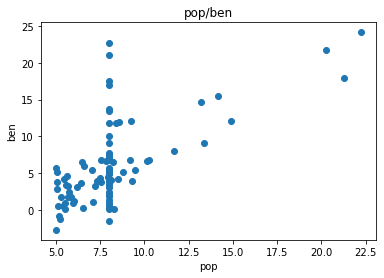

In [9]:
plt.scatter(data, label)
plt.title('pop/ben')
plt.xlabel('pop')
plt.ylabel('ben')
plt.show()

In [10]:
dataTrain, dataTest, labelTrain, labelTest = train_test_split(data, label, test_size=0.2)

In [11]:
regressor = LinearRegression()
regressor.fit(dataTrain, labelTrain)
print(regressor.coef_)
print(regressor.intercept_)

[1.10460253]
-3.409464196216833


In [12]:
prediction = regressor.predict(dataTest)
df = pd.DataFrame({'Actual': labelTest, 'predicted': prediction})
print(df)

     Actual  predicted
95   9.0551  11.385582
1    9.1302   5.427356
33   1.8495   3.098633
24   3.0825   5.427356
27   7.0467   5.427356
64  17.0540   5.427356
9    3.8166   2.173860
21  21.7670  18.980829
29  24.1470  21.116026
83   7.5435   5.427356
11  15.5050  12.236126
34   6.5426   5.660538
31   5.9966   3.869204
65   4.8852   5.427356
8    6.5987   3.755209
28  14.6920  11.144779
58   3.9624   6.874606
88   0.1520   2.688384
19   5.3893   4.400959
51   1.8396   2.453435


In [13]:
print('mean_absolute_error is:', mean_absolute_error(labelTest, prediction))
print('mean_squared_error is:', mean_squared_error(labelTest, prediction))
print('RMSE is:', np.sqrt(mean_squared_error(labelTest, prediction)))

mean_absolute_error is: 2.63556491675721
mean_squared_error is: 12.06737783211379
RMSE is: 3.4738131544620803
